In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

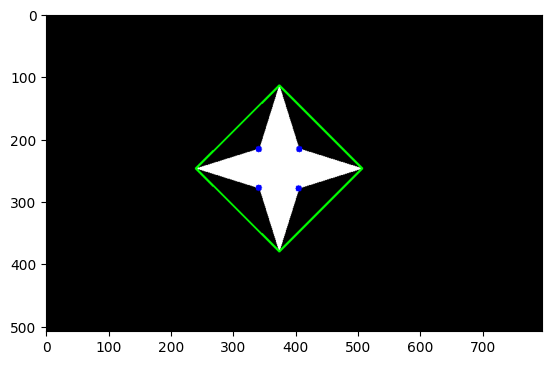

In [ ]:
img = cv.imread('../../img/star.png')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
'''
Выпуклая оболочка - это минимальная выпуклая фигура, содержащая все точки контура
returnPoints=False возвращает индексы точек, a не сами координаты
'''
hull = cv.convexHull(cnt,returnPoints = False)

'''
Дефекты выпуклости - это точки, где контур вогнут внутрь относительно выпуклой оболочки
'''
defects = cv.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    '''
    s - индекс начальной точки
    e - индекс конечной точки
    f - индекс самой дальней точки впадины
    d - расстояние до выпуклой оболочки
    '''
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,5,[0,0,255],-1)
plt.imshow(img)

This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

In [3]:
dist = cv.pointPolygonTest(cnt,(50,50),True)
dist

-273.69508581631493

1
3
0.20107215855543403
0.2720865659270937
0.008450501024491297


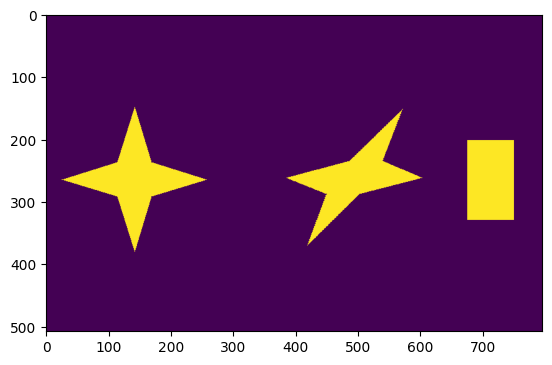

In [10]:
img1 = cv.imread('../../img/star.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('../../img/star2.png', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
print( len(contours) )
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( len(contours) )
print(cv.matchShapes(cnt1,contours[0],1,0.0))
print(cv.matchShapes(cnt1,contours[1],1,0.0))
print(cv.matchShapes(cnt1,contours[2],1,0.0))
plt.imshow(img2)